In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
sns.set()

In [48]:
dataset = pd.read_csv('data/titanic/train.csv')

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


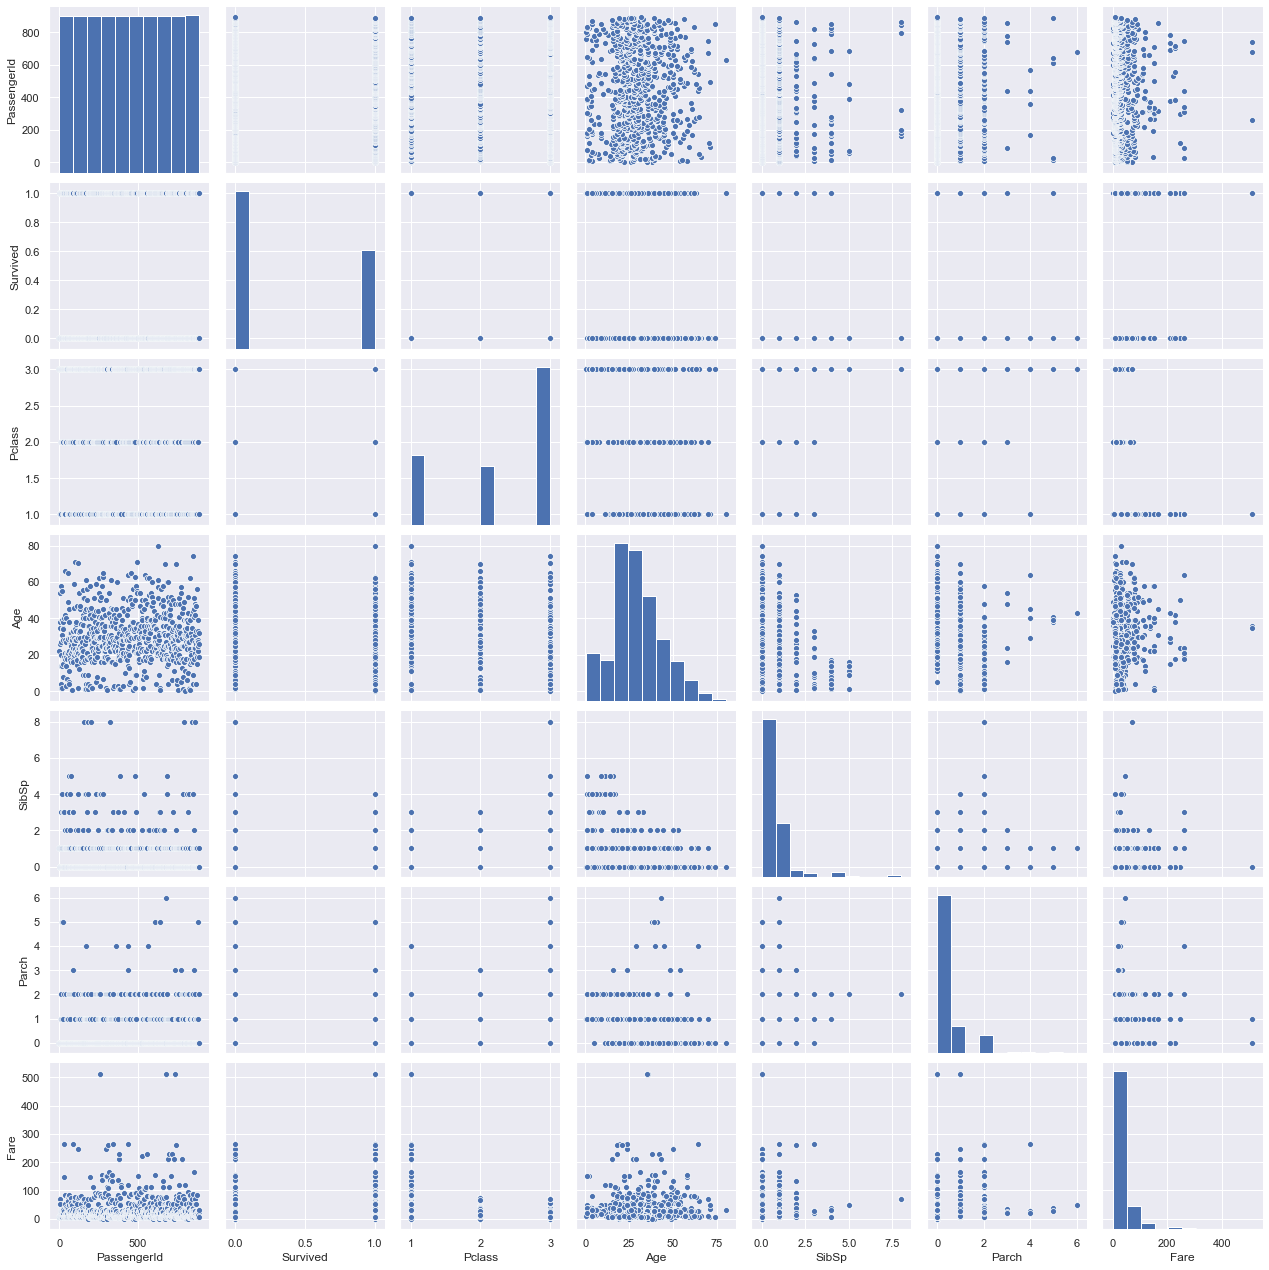

In [71]:
sns.pairplot(dataset)

In [50]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
dataset.drop(['Name', 'Cabin'], 1, inplace=True)

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [53]:
from sklearn.impute import SimpleImputer

In [54]:
imputer = SimpleImputer(strategy='mean')

In [55]:
dataset_x = dataset.drop('Survived', 1, inplace = False)
dataset_y = dataset['Survived']

In [56]:
dataset_x['Age'] = imputer.fit_transform(dataset_x[['Age']])

In [57]:
dataset_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [58]:
dataset_x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,female,35.0,1,0,113803,53.1000,S
4,5,3,male,35.0,0,0,373450,8.0500,S


In [59]:
obj_imp = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')

In [60]:
dataset_x['Embarked'] = obj_imp.fit_transform(dataset_x[['Embarked']])

In [61]:
dataset_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Feature Engineering

In [62]:
data_x_num = dataset_x.select_dtypes(['int64', 'float64'])
data_x_cat = dataset_x.select_dtypes(['object'])

In [63]:
data_x_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale = StandardScaler()

In [66]:
data_x_num = pd.DataFrame(scale.fit_transform(data_x_num), columns=data_x_num.columns)

In [67]:
data_x_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337


Text(0.5, 1, 'Correlation Between Data')

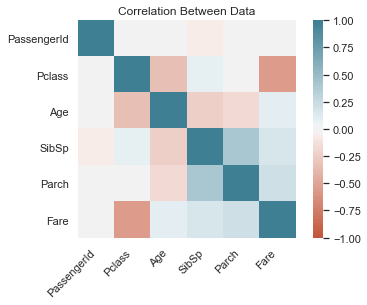

In [72]:
corr = data_x_num.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Between Data')

In [73]:
data_x_cat.head()

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S


In [74]:
sex_dummy = pd.get_dummies(data_x_cat['Sex'], drop_first = True)
ticket_dummy = pd.get_dummies(data_x_cat['Ticket'], drop_first = True)
emb_dummy = pd.get_dummies(data_x_cat['Embarked'], drop_first = True)

In [75]:
data_x = data_x_num.join([sex_dummy, ticket_dummy, emb_dummy])

In [77]:
data_x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,110413,110465,110564,...,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735,Q,S
0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
889,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test Dataset

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
train_x,test_x,train_y,test_y = train_test_split(data_x, dataset_y, test_size = 0.2, random_state=42)

In [83]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

class classification_hook:
    
    def __init__(self, x, y, x_, y_, dict_=False):
        
        self.x_test = x
        self.y_test = y
        self.x_train = x_
        self.y_train = y_
        self.dict_ins = {}
        self.dict = dict_
    
    def confusion(self, mat, classifier_):
        
        sns.heatmap(mat, annot=True, fmt='d')
        plt.title(classifier_)
        plt.show()
    
    def ADA(self):
        
        model = AdaBoostClassifier(n_estimators=100, random_state=0).fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'AdaBoostClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'AdaBoostClassifier')
    
    def GRAD_2(self):
        
        model = GradientBoostingClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'GradientBoostingClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'GradientBoostingClassifier')
    
    def LOG(self):
        
        model = LogisticRegression(max_iter = 9999).fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'Logistic Score: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'Logistic Classifier')
        
    
    def GRAD(self):
        
        model = SGDClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'SGDClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'SGDClassifier')
        
            
    def VECTOR(self):
        
        model = SVC().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'SVC: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'Support Vector Classifier')
    
    def KN(self):
        
        model = KNeighborsClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'KNeighborsClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'KNeighborsClassifier')
    
    def ense(self):
        
        model = RandomForestClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'RandomForestClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'RandomForestClassifier')
    
    def tree(self):
        
        model = DecisionTreeClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'DecisionTreeClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'DecisionTreeClassifier')
    
    def bayes(self):
        
        model = GaussianNB().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'GaussianNB: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'GaussianNB')
    

    
    def start(self):
        
        print("""Staring Classification Training & Testing""")
        print()
        self.LOG()
        self.GRAD()
        self.VECTOR()
        self.KN()
        self.ense()
        self.tree()
        self.bayes()
        self.ADA()
        self.GRAD_2()

Staring Classification Training & Testing

Logistic Score: 82.68156424581005 % Acc


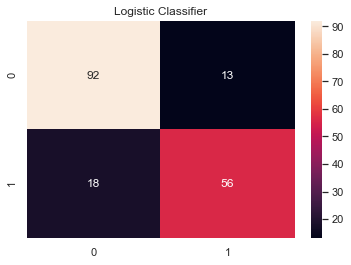

SGDClassifier: 84.91620111731844 % Acc


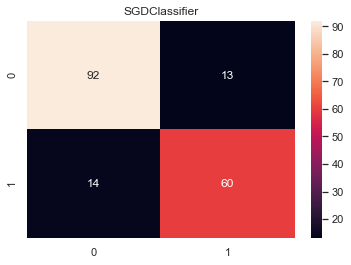

SVC: 81.56424581005587 % Acc


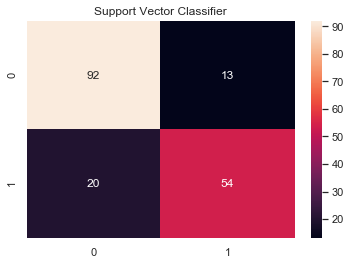

KNeighborsClassifier: 81.00558659217877 % Acc


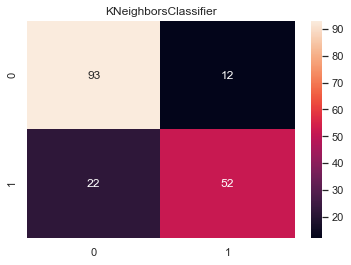

RandomForestClassifier: 82.12290502793296 % Acc


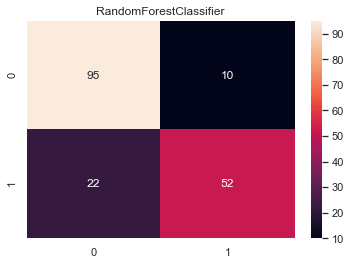

DecisionTreeClassifier: 81.56424581005587 % Acc


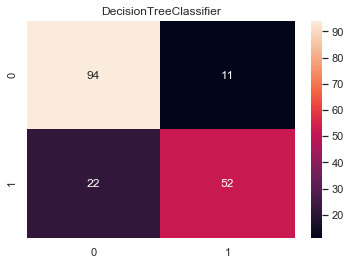

GaussianNB: 50.27932960893855 % Acc


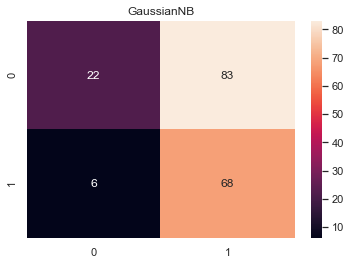

AdaBoostClassifier: 77.09497206703911 % Acc


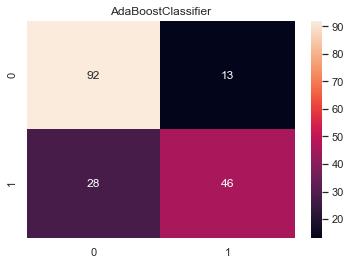

GradientBoostingClassifier: 79.88826815642457 % Acc


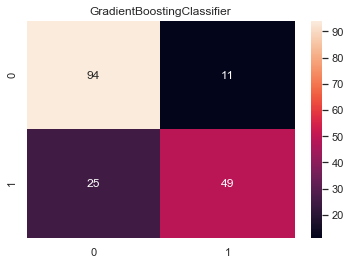

In [84]:
classification_hook(test_x,test_y,train_x,train_y).start()